In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Read Data from CSV File

In [3]:
data = pd.read_csv('Maybank.csv')

### Data Descriptions

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-03-01,8.238324,8.286221,8.046735,8.046735,2.275965,54426939.0
1,2000-03-02,8.046735,8.046735,7.759352,7.759352,2.194681,55151407.0
2,2000-03-03,7.759352,7.759352,7.424071,7.567763,2.140491,37436397.0
3,2000-03-06,7.663557,7.855146,7.424071,7.424071,2.099849,14591656.0
4,2000-03-07,7.424071,7.663557,7.424071,7.567763,2.140491,13562369.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5033 entries, 0 to 5032
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5033 non-null   object 
 1   Open       5032 non-null   float64
 2   High       5032 non-null   float64
 3   Low        5032 non-null   float64
 4   Close      5032 non-null   float64
 5   Adj Close  5032 non-null   float64
 6   Volume     5032 non-null   float64
dtypes: float64(6), object(1)
memory usage: 275.4+ KB


### Data Preprocessing

In [6]:
import datetime

def str_to_datetime(s):
    split = s.split('-')
    year,month,day = int(split[0]),int(split[1]),int(split[2])
    return datetime.datetime(year=year,month=month,day=day)

datetime_object = str_to_datetime('2000-03-01')
datetime_object

datetime.datetime(2000, 3, 1, 0, 0)

In [7]:
data['Date'] = data['Date'].apply(str_to_datetime)
data['Date']

0      2000-03-01
1      2000-03-02
2      2000-03-03
3      2000-03-06
4      2000-03-07
          ...    
5028   2020-03-05
5029   2020-03-06
5030   2020-03-09
5031   2020-03-10
5032   2020-03-11
Name: Date, Length: 5033, dtype: datetime64[ns]

In [8]:
data=data.dropna() ##Droping the data that contain NaN

In [9]:
# Preprocess and normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close']])

# Define the look_back window and create input-output pairs
look_back = 60
X, y = [], []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back].flatten())
    y.append(scaled_data[i+look_back][0])

X = np.array(X)
y = np.array(y)

In [10]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(units=64, activation='sigmoid', input_dim=look_back),
    Dense(units=32, activation='tanh'),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='linear') 
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.1)

Epoch 1/100
112/112 [==============================] - 2s 3ms/step - loss: 0.0321 - val_loss: 0.0013
Epoch 2/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 3/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 4/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 7.2072e-04
Epoch 5/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.6683e-04
Epoch 6/100
112/112 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 6.2199e-04
Epoch 7/100
112/112 [==============================] - 0s 2ms/step - loss: 8.3836e-04 - val_loss: 8.6418e-04
Epoch 8/100
112/112 [==============================] - 0s 1ms/step - loss: 8.8691e-04 - val_loss: 7.9129e-04
Epoch 9/100
112/112 [==============================] - 0s 1ms/step - loss: 8.2457e-04 - val_loss: 5.7800e-04
Epoch 10/100
112/112 [==============================] -

32/32 [==============================] - 0s 2ms/step
Mean Squared Error: 0.0103


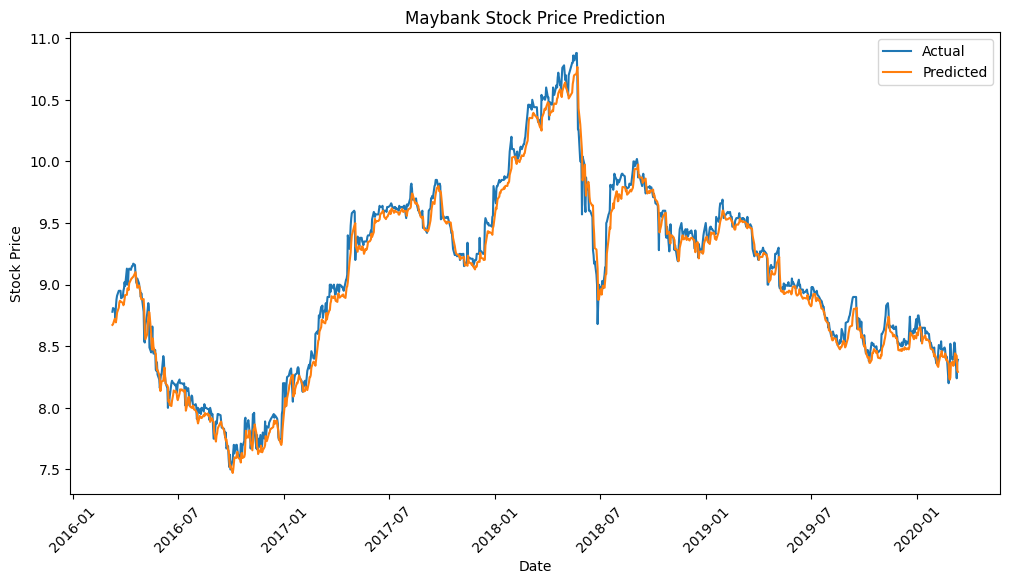

In [12]:
# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions and actual values to their original scales
predictions = scaler.inverse_transform(predictions)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Get the corresponding dates for the test set
test_dates = data['Date'].iloc[-len(x_test):].values

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error: {mse:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label='Actual')
plt.plot(test_dates, predictions, label='Predicted')
plt.title('Maybank Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, predictions)
print(f"Mean Squared Error (MSE): {mse:.4f}")
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, predictions)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate R-squared (R2) - Coefficient of determination
r2 = r2_score(y_test_original, predictions)
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 0.0103
Root Mean Squared Error (RMSE): 0.1014
Mean Absolute Error (MAE): 0.0779
R-squared (R2): 0.9809
